In [3]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from community import community_louvain
import matplotlib.pyplot as plt


/var/folders/9s/7pmn69j96h716ft7787r9_kw0000gn/T/ipykernel_10891/3715469961.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('City Network.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,40.0,Amsterdam,Utrecht
1,28.7,Leiden,Schiphol
2,22.9,Den Haag,Leiden
3,17.4,Woerden,Gouda
4,19.9,Utrecht,Woerden
5,24.1,Woerden,Alphen aan de rijn
6,7.5,Den Haag,Delft
7,19.9,Zaandam,Amsterdam
8,25.5,Zaandam,Haarlem
9,21.5,Haarlem,Schiphol


In [5]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [6]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zaandam', 'Haarlem', 'Almere', 'Hilversum', 'Zoetermeer', 'Amersfoort', 'Rotterdam', 'Vlaardingen', 'Spijkenisse', 'Dordrecht']


In [7]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Schiphol', 'Leiden', 'Den Haag', 'Delft']


In [8]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

4


In [9]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

78.3


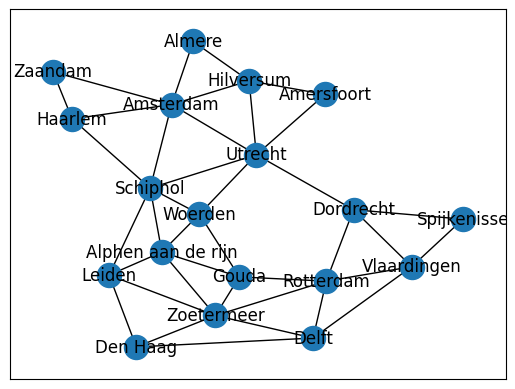

In [10]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

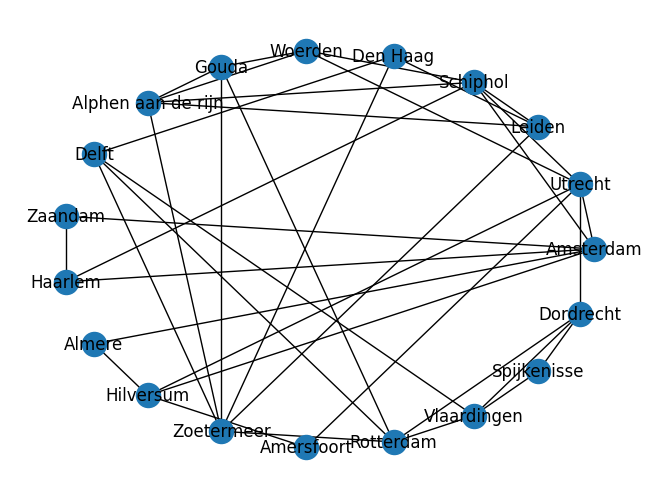

In [11]:
# Plot the graph, using a cicular layout
#nx.draw_circular(Randstad_Graph)
nx.draw_circular(Randstad_Graph, with_labels=True)

In [12]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 28.974999999999998,
 'Utrecht': 49.82142857142857,
 'Leiden': 15.07142857142857,
 'Schiphol': 38.29285714285714,
 'Den Haag': 2.2928571428571427,
 'Woerden': 9.195238095238095,
 'Gouda': 5.5619047619047635,
 'Alphen aan de rijn': 10.038095238095238,
 'Delft': 5.542857142857142,
 'Zaandam': 0.0,
 'Haarlem': 3.6083333333333334,
 'Almere': 0.0,
 'Hilversum': 5.7023809523809526,
 'Zoetermeer': 13.864285714285712,
 'Amersfoort': 0.0,
 'Rotterdam': 13.291666666666664,
 'Vlaardingen': 7.639285714285713,
 'Spijkenisse': 0.0,
 'Dordrecht': 31.10238095238095}

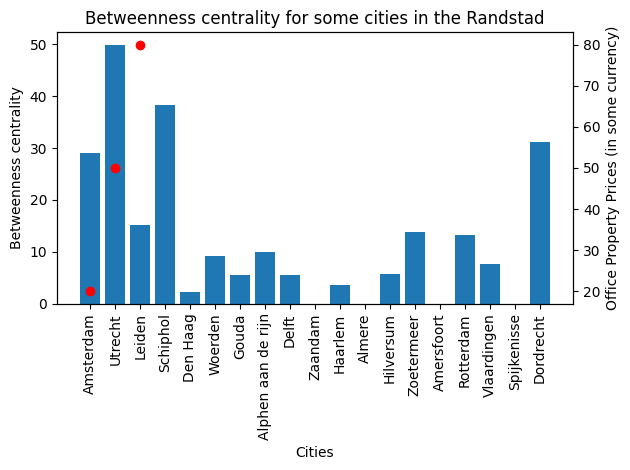

In [35]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.xticks(rotation=90)

cities = ['Amsterdam', 'Rotterdam', 'Zoetermeer']  # Replace with your actual city names
prices = [20, 50, 80]
office_prices = dict(zip(cities, prices))

plt.twinx()  # Create a twin Axes sharing the same x-axis
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (in some currency)')

plt.tight_layout()

In [14]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.029239766081871343,
 ('Amsterdam', 'Zaandam'): 0.09941520467836257,
 ('Amsterdam', 'Schiphol'): 0.1695906432748538,
 ('Amsterdam', 'Almere'): 0.05263157894736842,
 ('Amsterdam', 'Hilversum'): 0.04093567251461988,
 ('Amsterdam', 'Haarlem'): 0.029239766081871343,
 ('Utrecht', 'Woerden'): 0.2046783625730994,
 ('Utrecht', 'Schiphol'): 0.011695906432748537,
 ('Utrecht', 'Hilversum'): 0.1111111111111111,
 ('Utrecht', 'Amersfoort'): 0.07602339181286549,
 ('Utrecht', 'Dordrecht'): 0.03508771929824561,
 ('Leiden', 'Schiphol'): 0.19883040935672514,
 ('Leiden', 'Den Haag'): 0.07017543859649122,
 ('Leiden', 'Alphen aan de rijn'): 0.03508771929824561,
 ('Leiden', 'Zoetermeer'): 0.14035087719298245,
 ('Schiphol', 'Haarlem'): 0.07017543859649122,
 ('Schiphol', 'Woerden'): 0.023391812865497075,
 ('Schiphol', 'Alphen aan de rijn'): 0.05263157894736842,
 ('Den Haag', 'Delft'): 0.06432748538011696,
 ('Den Haag', 'Zoetermeer'): 0.04093567251461988,
 ('Woerden', 'Gouda'): 0.192

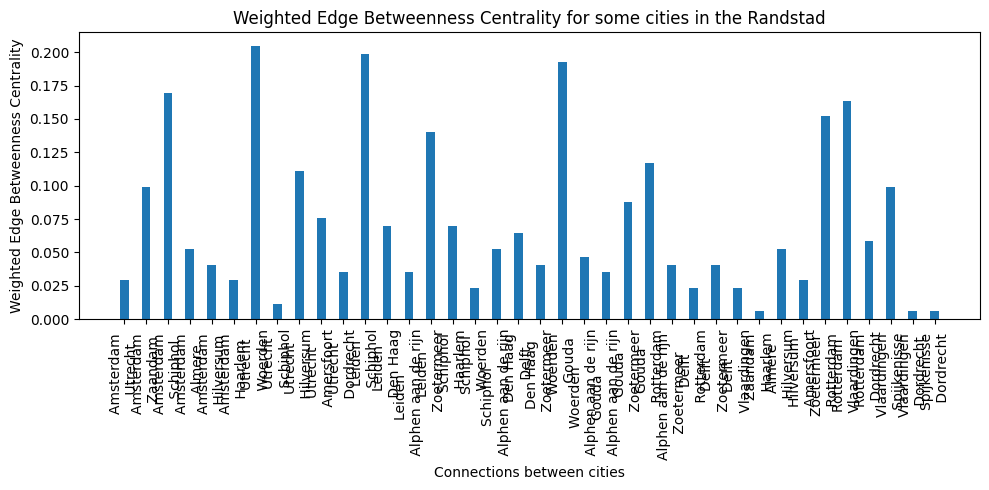

In [15]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [16]:
# first print all nodes/cities
list(nx.nodes(Randstad_Graph)) 

['Amsterdam',
 'Utrecht',
 'Leiden',
 'Schiphol',
 'Den Haag',
 'Woerden',
 'Gouda',
 'Alphen aan de rijn',
 'Delft',
 'Zaandam',
 'Haarlem',
 'Almere',
 'Hilversum',
 'Zoetermeer',
 'Amersfoort',
 'Rotterdam',
 'Vlaardingen',
 'Spijkenisse',
 'Dordrecht']

In [17]:
#print all edges/connections in the network
list (nx.edges(Randstad_Graph))

[('Amsterdam', 'Utrecht'),
 ('Amsterdam', 'Zaandam'),
 ('Amsterdam', 'Schiphol'),
 ('Amsterdam', 'Almere'),
 ('Amsterdam', 'Hilversum'),
 ('Amsterdam', 'Haarlem'),
 ('Utrecht', 'Woerden'),
 ('Utrecht', 'Schiphol'),
 ('Utrecht', 'Hilversum'),
 ('Utrecht', 'Amersfoort'),
 ('Utrecht', 'Dordrecht'),
 ('Leiden', 'Schiphol'),
 ('Leiden', 'Den Haag'),
 ('Leiden', 'Alphen aan de rijn'),
 ('Leiden', 'Zoetermeer'),
 ('Schiphol', 'Haarlem'),
 ('Schiphol', 'Woerden'),
 ('Schiphol', 'Alphen aan de rijn'),
 ('Den Haag', 'Delft'),
 ('Den Haag', 'Zoetermeer'),
 ('Woerden', 'Gouda'),
 ('Woerden', 'Alphen aan de rijn'),
 ('Gouda', 'Alphen aan de rijn'),
 ('Gouda', 'Zoetermeer'),
 ('Gouda', 'Rotterdam'),
 ('Alphen aan de rijn', 'Zoetermeer'),
 ('Delft', 'Rotterdam'),
 ('Delft', 'Zoetermeer'),
 ('Delft', 'Vlaardingen'),
 ('Zaandam', 'Haarlem'),
 ('Almere', 'Hilversum'),
 ('Hilversum', 'Amersfoort'),
 ('Zoetermeer', 'Rotterdam'),
 ('Rotterdam', 'Vlaardingen'),
 ('Rotterdam', 'Dordrecht'),
 ('Vlaardingen', 

In [18]:
# print all the shortest paths in the network from each city
L = list(nx.all_pairs_dijkstra(Randstad_Graph))
print (L)

[('Amsterdam', ({'Amsterdam': 0, 'Schiphol': 19.2, 'Zaandam': 19.9, 'Haarlem': 20.0, 'Almere': 29.9, 'Hilversum': 30.5, 'Utrecht': 40.0, 'Alphen aan de rijn': 43.099999999999994, 'Leiden': 47.9, 'Woerden': 50.3, 'Amersfoort': 54.1, 'Gouda': 60.8, 'Zoetermeer': 61.7, 'Den Haag': 70.8, 'Delft': 78.3, 'Rotterdam': 80.30000000000001, 'Vlaardingen': 92.20000000000002, 'Dordrecht': 99.2, 'Spijkenisse': 106.60000000000002}, {'Amsterdam': ['Amsterdam'], 'Utrecht': ['Amsterdam', 'Utrecht'], 'Zaandam': ['Amsterdam', 'Zaandam'], 'Schiphol': ['Amsterdam', 'Schiphol'], 'Almere': ['Amsterdam', 'Almere'], 'Hilversum': ['Amsterdam', 'Hilversum'], 'Haarlem': ['Amsterdam', 'Haarlem'], 'Leiden': ['Amsterdam', 'Schiphol', 'Leiden'], 'Woerden': ['Amsterdam', 'Schiphol', 'Woerden'], 'Alphen aan de rijn': ['Amsterdam', 'Schiphol', 'Alphen aan de rijn'], 'Amersfoort': ['Amsterdam', 'Hilversum', 'Amersfoort'], 'Dordrecht': ['Amsterdam', 'Utrecht', 'Dordrecht'], 'Gouda': ['Amsterdam', 'Schiphol', 'Alphen aan de

In [19]:
#betweenness centrality (B for betweeness centrality) 
B = nx.betweenness_centrality(Randstad_Graph)

In [20]:
#Degree centrality (D for Degree centrality) 
D = nx.degree_centrality(Randstad_Graph)

In [21]:
#closeness centrality (C for closeness )
C = nx.closeness_centrality(Randstad_Graph)

In [22]:
# create a dataframe to store centrality measures
df = pd.DataFrame({
    'Node': list(Randstad_Graph.nodes),
    'Betweenness Centrality': [B[node] for node in Randstad_Graph.nodes],
    'Degree Centrality': [D[node] for node in Randstad_Graph.nodes],
    'Closeness Centrality': [C[node] for node in Randstad_Graph.nodes]
})


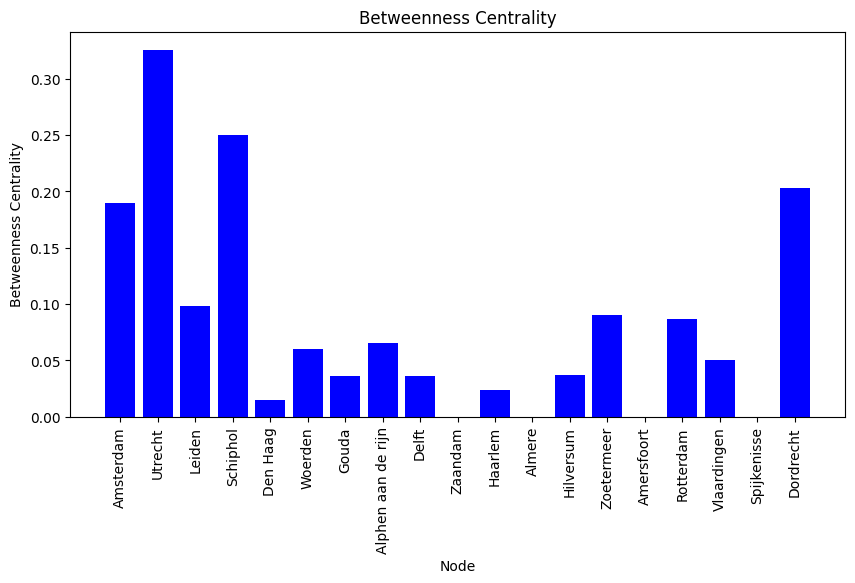

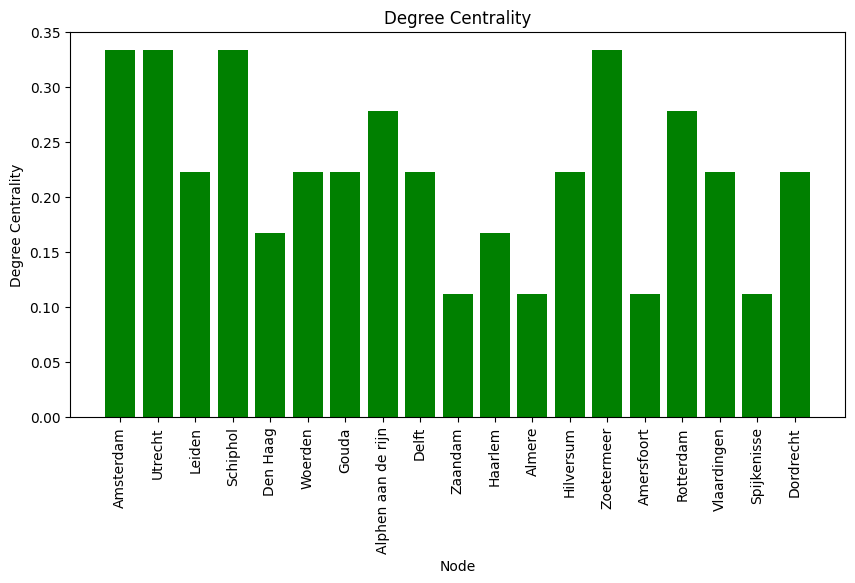

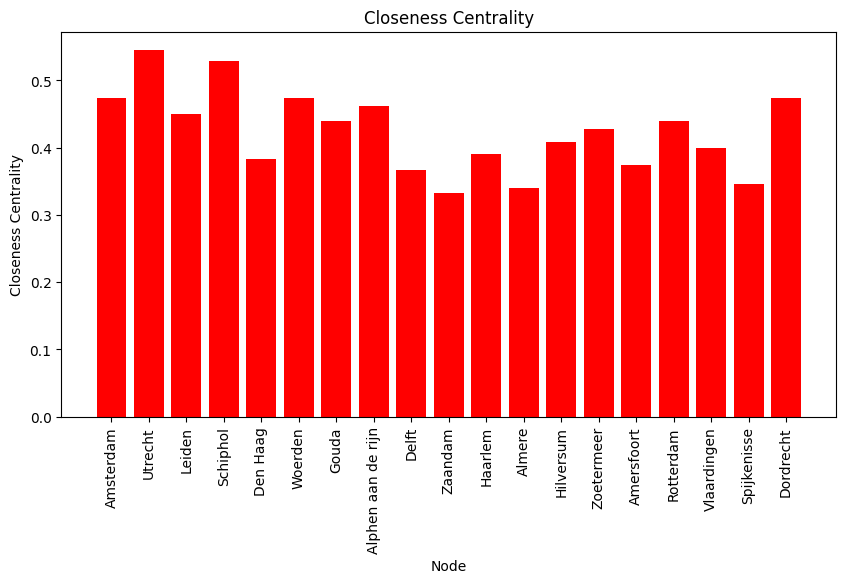

In [23]:
#plot 3 graphs to visualize the results in the dataframe and see which cities are most significant 
import matplotlib.pyplot as plt

# Plot betweenness centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Betweenness Centrality'], color='blue')
plt.title('Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

# Plot degree centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Degree Centrality'], color='green')
plt.title('Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.show()

# Plot closeness centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Closeness Centrality'], color='red')
plt.title('Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Calculate and plot the weighted edge betweenness centrality
#edge_betweenness_weighted = nx.edge_betweenness_centrality(Randstad_Graph, normalized=True, weight='weight')

#plt.figure(figsize=(12, 8))
#pos = nx.spring_layout(Randstad_Graph)
#nx.draw_networkx_nodes(Randstad_Graph, pos=pos, node_color='blue', node_size=500)

# Draw edges with width proportional to edge betweenness centrality
#edge_widths = [10 * edge_betweenness_weighted[edge] for edge in Randstad_Graph.edges()]
#nx.draw_networkx_edges(Randstad_Graph, pos=pos, width=edge_widths, edge_color='gray', alpha=0.5)

# Draw labels with adjusted font size
#nx.draw_networkx_labels(Randstad_Graph, pos=pos, font_size=10)

#plt.title('Weighted Edge Betweenness Centrality')
#plt.axis('off')  # Turn off axis
#plt.show()


{'Amsterdam': 0.08413720086252173, 'Utrecht': 0.10270255520356486, 'Leiden': 0.047031348544282287, 'Schiphol': 0.08574873040802622, 'Den Haag': 0.03197172706418457, 'Woerden': 0.04990196905569903, 'Gouda': 0.04458420413085036, 'Alphen aan de rijn': 0.05485592916667861, 'Delft': 0.035952842727786, 'Zaandam': 0.02992398300726095, 'Haarlem': 0.04051495535121391, 'Almere': 0.03377243682955541, 'Hilversum': 0.0557005446937231, 'Zoetermeer': 0.06210110418952866, 'Amersfoort': 0.029507378176142154, 'Rotterdam': 0.05568012436765313, 'Vlaardingen': 0.04372126347967266, 'Spijkenisse': 0.03074670572263595, 'Dordrecht': 0.08144499701902023}


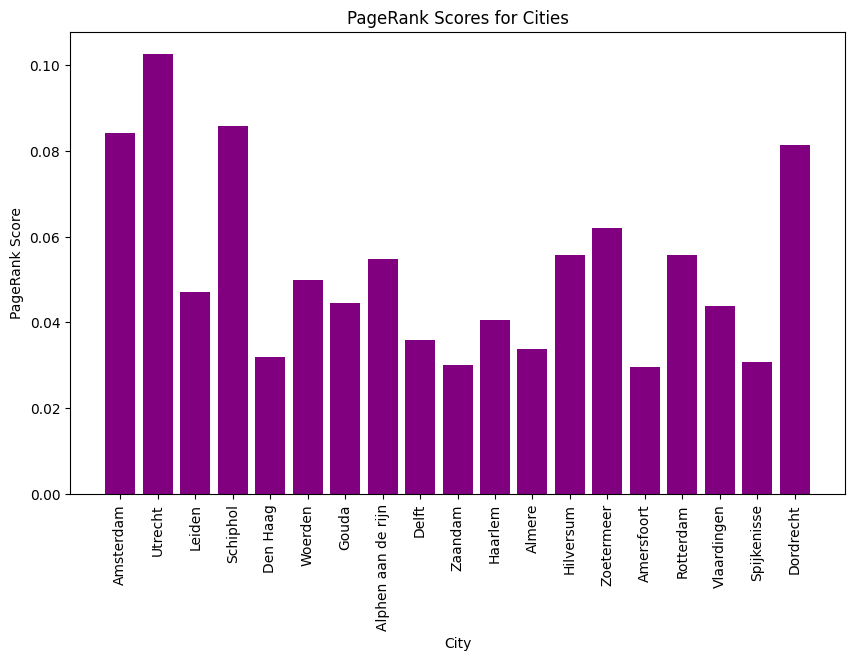

In [25]:
#calculate and plot the page ranks of the cities, to see their relative importance 
page_rank = nx.pagerank(Randstad_Graph)
print(page_rank)

# Plot PageRank scores
plt.figure(figsize=(10, 6))
plt.bar(page_rank.keys(), page_rank.values(), color='purple')
plt.title('PageRank Scores for Cities')
plt.xlabel('City')
plt.ylabel('PageRank Score')
plt.xticks(rotation=90)
plt.show()

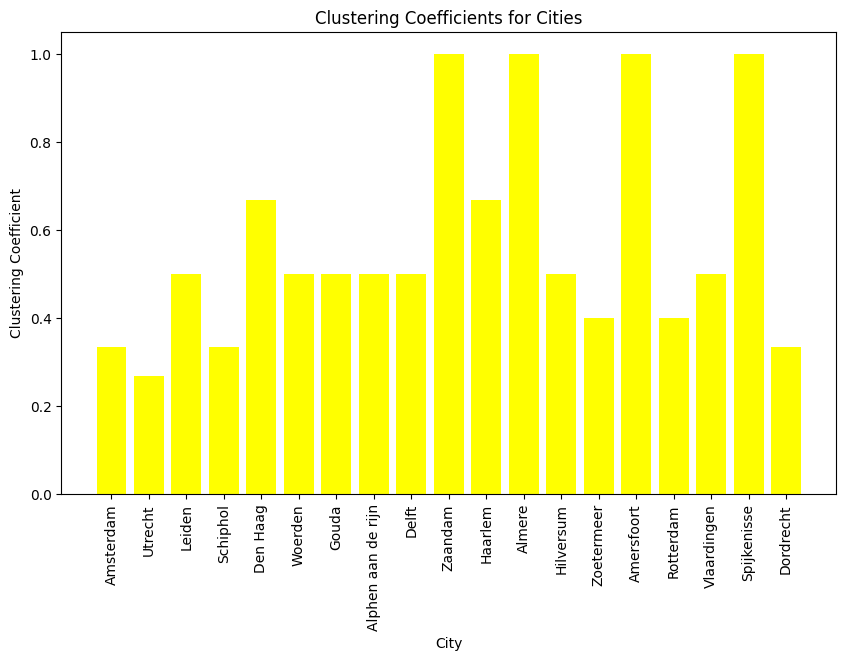

In [26]:
#Calculate clustering coefficients
clustering_coefficients = nx.clustering(Randstad_Graph)

# Plot clustering coefficients
plt.figure(figsize=(10, 6))
plt.bar(clustering_coefficients.keys(), clustering_coefficients.values(), color='yellow')
plt.title('Clustering Coefficients for Cities')
plt.xlabel('City')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

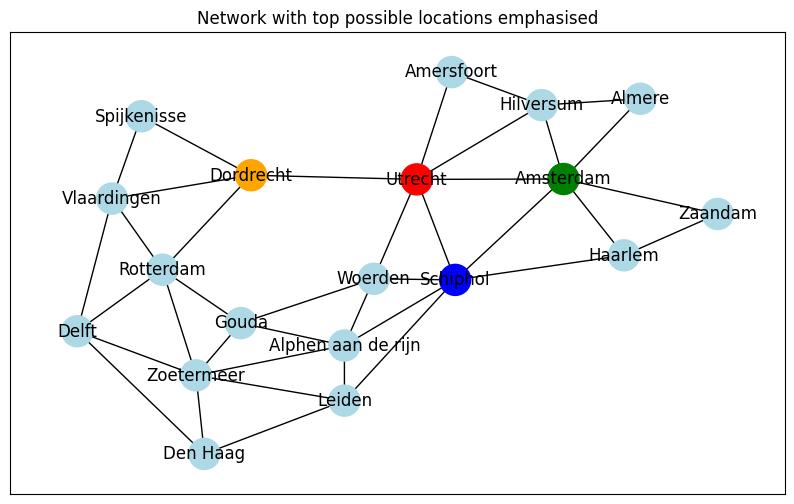

In [27]:
#make a new visualisation with the top 4 places we are now considering 
#define node colors
node_colors = {
    'Utrecht': 'red',
    'Schiphol': 'blue',
    'Amsterdam': 'green',
    'Dordrecht': 'orange'
}

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(Randstad_Graph) 
nx.draw_networkx_nodes(Randstad_Graph, pos=pos, node_color=[node_colors.get(node, 'lightblue') for node in Randstad_Graph.nodes()], node_size=500)

nx.draw_networkx_edges(Randstad_Graph, pos=pos)

nx.draw_networkx_labels(Randstad_Graph, pos=pos)

plt.title('Network with top possible locations emphasised')
plt.show()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

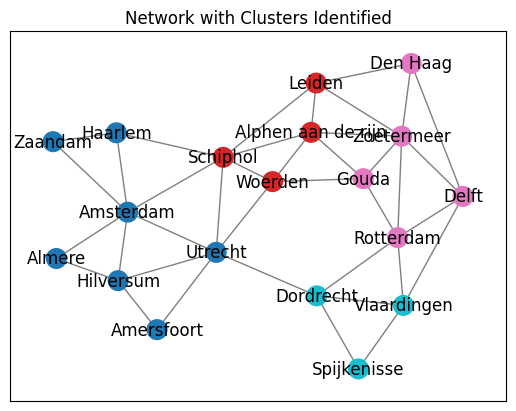

In [28]:
partition = community_louvain.best_partition(Randstad_Graph)


pos = nx.spring_layout(Randstad_Graph)  # Positions for all nodes


# Draw nodes and edges
nx.draw_networkx_nodes(Randstad_Graph, pos, node_size=200, cmap=plt.get_cmap('tab10'), node_color=list(partition.values()))
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)


# Draw node labels
nx.draw_networkx_labels(Randstad_Graph, pos)


plt.title("Network with Clusters Identified")
plt.show()


In [29]:
#to normalize the data we need to define the populations of each city
populations = {
    'Amsterdam': 1056,
    'Haarlem': 190,
    'Schiphol': 187,
    'Leiden': 146,
    'Den Haag': 647,
    'Zoetermeer': 146,
    'Delft': 122,
    'Rotterdam': 763,
    'Spijkenisse': 83,
    'Dordrecht': 140,
    'Vlaardingen': 86,
    'Alphen aan de rijn': 131,
    'Gouda': 87,
    'Woerden': 61,
    'Utrecht': 423,
    'Hilversum': 107,
    'Almere': 256,
    'Amersfoort': 185,
    'Zaandam': 184
}

In [30]:
from sklearn.preprocessing import MinMaxScaler

# First we need to scale the polulation/ employye population in each city to a value ebtween 0 and 1
scaler = MinMaxScaler()
scaled_populations = scaler.fit_transform([[pop] for pop in populations.values()]).flatten()

# then these scaled values need to equate to wights attached to each node
for city, scaled_pop in zip(populations.keys(), scaled_populations):
    Randstad_Graph.nodes[city]['employee_weight_factor'] = scaled_pop

# Calculate weighted betweenness centrality
B_weighted = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}

# Calculate weighted closeness centrality
C_weighted = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}

# Calculate PageRank with weighted nodes
pagerank = nx.pagerank(Randstad_Graph, weight='employee_weight_factor')

# Plot the results
plt.figure(figsize=(10, 6))

# Weighted Betweenness Centrality
plt.bar(B_weighted.keys(), B_weighted.values(), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Weighted Closeness Centrality
plt.figure(figsize=(10, 6))
plt.bar(C_weighted.keys(), C_weighted.values(), color='green')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank
plt.figure(figsize=(10, 6))
plt.bar(pagerank.keys(), pagerank.values(), color='orange')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Randstad (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'sklearn'

In [ ]:
 


# Calculate weighted betweenness centrality - i think this is the wrong way but i will keep it in for now till i talk to the professor 
B_weighted = {city: nx.betweenness_centrality(Randstad_Graph)[city] * populations[city] for city in Randstad_Graph.nodes()}

# Plot weighted betweenness centrality
plt.figure(figsize=(10, 6))
plt.bar(B_weighted.keys(), B_weighted.values(), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:

# Calculate weighted closeness centrality - i think this is the wrong way but i will keep it in for now till i talk to the professor 
C_weighted = {city: nx.closeness_centrality(Randstad_Graph)[city] * populations[city] for city in Randstad_Graph.nodes()}

# Plot weighted closeness centrality
plt.figure(figsize=(10, 6))
plt.bar(C_weighted.keys(), C_weighted.values(), color='red')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



